#**El Alzheimer y su detección**

###**Abstacto**

La enfermedad de Alzheimer es un trastorno cerebral que destruye lentamente la memoria y la capacidad de pensar y, con el tiempo, la habilidad de llevar a cabo hasta las tareas más sencillas. Las personas con Alzheimer también experimentan cambios en la conducta y la personalidad.

Los síntomas de Alzheimer (cambios en la forma de pensar, recordar, razonar y comportarse) se conocen como demencia. Por esta razón, algunas veces se hace referencia a la enfermedad de Alzheimer simplemente como “demencia”. Otras enfermedades y afecciones también pueden ocasionar demencia, pero la enfermedad de Alzheimer es su causa más frecuente en las personas mayores.

La enfermedad de Alzheimer no es una parte normal del envejecimiento, sino que es el resultado de cambios complejos en el cerebro que empiezan años antes de que aparezcan los síntomas y que originan la pérdida de neuronas y sus conexiones.

El presente proyecto de investigación tiene como objetivo el identificar aquellos factores que inciden en la generación de demencia en algún individuo, específicamente, aquellos que no poseen el riesgo genético (ser familiar de alguien que tuvo demencia). Por lo tanto, es de interés generar una herramienta predictiva dirigida a público objetivo dedicado a la medicina, que permita detectar aquellos elementos potenciales que puedan ser causantes de la enfermedad de Alzheimer.

###**Contexto analítico**

El factor de riesgo conocido más importante de la enfermedad de Alzheimer es el aumento de la edad, debido a que la mayoría de las personas que presentan dicha enfmerde son mayores de 65 años, sin mebargo, esta condición no es solo una enfermedad de la vejez, debido a que aproximadamente 200.000 estadounidenses menores de 65 años tienen enfermedad de Alzheimer de inicio precoz (también conocida como Alzheimer de inicio temprano).

El Alzheimer empeora con el tiempo. El Alzheimer es una enfermedad progresiva, en la que los síntomas de demencia empeoran gradualmente con el paso de los años. En sus primeras etapas, la pérdida de memoria es leve, pero en la etapa final del Alzheimer, las personas pierden la capacidad de mantener una conversación y responder al entorno. El Alzheimer es la sexta principal causa de muerte en los Estados Unidos. Las personas con Alzheimer viven un promedio de ocho años después de que los síntomas se vuelven evidentes, pero la supervivencia puede oscilar entre cuatro y 20 años, dependiendo de la edad y otras afecciones de salud.

Al respecto, y considerando los diferentes impactos relacionados a esta enfermedad, surge la siguiente interrogante ¿es posible detectar tempranamente, en aquellos individuos que no poseen una disposición genética, la generación de Alzheimer?

Por lo tanto, y a través de técnicas de machine learning, se planea generar un modelo predictivo que logre anticipar la generación de dicha actividad en individuos que no poseen una condición genética específica, con la finalidad de proporcionar a profesionales dedicados a la medicina una herramienta para la prevención de mencionada enfermedad.     

Fuente: https://www.alz.org/

###**Hipótesis a resolver mediante el análisis de datos**

Considerando ciertos parámetros asociados al estilo de vida de un individuo ¿es posible predecir si esa persona tiene riesgo elevado de padecer Alzheimer?

###**Objetivo**

El objetivo principal de este estudio, es el desarrollo de un modelo que sea sea capaz de predecir, con alto nivel de precisión, la probabilidad de que un individuo padezca Alzheimer, teniendo como insumo diversas características y estilo de vida de éste.

##**Lectura y análisis de datos**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_alzheimer = pd.read_csv('https://raw.githubusercontent.com/NlilloC/Pruebas-DS/refs/heads/main/alzheimers_disease_data.csv')
df_alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
#Transformar columna 'PatientID' en índice
df_alzheimer.set_index('PatientID', inplace=True)
df_alzheimer.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


###**Análisis inical dataset**

In [4]:
df_alzheimer.shape

(2149, 34)

In [5]:
df_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4751 to 6899
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64  

###**Variables**

**Detalles Demográficos**

    Age: La edad del paciente, compuesta entre los 60 y 90 años.
   
    Gender: Género del paciente, donde 0 representa Masculino y 1 Femenino.
   
    Ethnicity: La etnia del paciente, de acuerdo al siguiente código:
    0: Caucásico
    1: Afroamericano
    2: Asiático
    3: Otro.

    EducationLevel: El nivel de educación del paciente, de acuerdo al siguiente código:
    0: Educación básica
    1: Educación media
    2: Universitario
    3: Master o superior.

**Estilo de Vida**

    BMI: Índice de masa corpotal, con un rango de 15 a 40.
   
    Smoking: Si el paciente fuma o no, donde 0 indica No y 1 Si.
   
    AlcoholConsumption: Consumo semanal de alcohol en litros, con un rango de  0 a 20.
   
    PhysicalActivity: Actividad física semanal expresada en horas, con un rango de 0 a 10.
   
    DietQuality: Puntaje que demuestra la calidad en la dieta del paciente, con un rango que va desde el 0 al 10.
   
    SleepQuality: Puntaje sobre la calidad del sueño, con un rango que va desde el 4 al 10.

**Historial Médico**

    FamilyHistoryAlzheimers: Demuestra si en la familia del paciente existe algún miembro con la enfermedad de Alzheimer, donde 0 indica No y 1 indica Si.
    
    CardiovascularDisease: Presencia de enfermedad cardiovascular en el paciente, donde 0 indica No y 1 indica Si.
    
    Diabetes: Presencia de diabetes en el paciente, donde 0 indica No y 1 indica Si.
    
    Depression: Presencia de depresión en el paciente, donde 0 indica No y 1 indica Si.
    
    HeadInjury: Historial del paciente si padece de dolores de cabeza frecuentes, donde 0 indica No y 1 indica Si.
    
    Hypertension: Presencia de hipertensión en el paciente, donde 0 indica No y 1 indica Si.

**Ficha Clínica**

    SystolicBP: Presión arterial sistólica, que oscila entre 90 y 180 mmHg.

    DiastolicBP: Presión arterial diastólica: presión arterial diastólica, que oscila entre 60 y 120 mmHg.
    
    CholesterolTotal: Niveles de colesterol total, que oscilan entre 150 y 300 mg/dl.
    
    CholesterolLDL: Niveles de colesterol de lipoproteínas de baja densidad, que oscilan entre 50 y 200 mg/dl.
    
    CholesterolHDL: Niveles de colesterol de lipoproteínas de alta densidad, que oscilan entre 20 y 100 mg/dl.
    
    CholesterolTriglycerides: Niveles de triglicéridos, que oscilan entre 50 y 400 mg/dl.

**Evaluaciones cognitivas y funcionales**

    MMSE: Puntaje en el Mini-Mental State Examination, que va de 0 a 30. Los puntajes más bajos indican deterioro cognitivo.
    
    FunctionalAssessment: Puntaje en la evaluación funcional, que va de 0 a 10. Los puntajes más bajos indican un mayor deterioro.
    
    MemoryComplaints: Presencia de problemas de memoria, donde 0 indica No y 1 indica Sí.
    
    BehavioralProblems: Presencia de problemas de conducta, donde 0 indica No y 1 indica Sí.
    
    ADL: puntaje en las actividades de la vida diaria, que va de 0 a 10. Los puntajes más bajos indican un mayor deterioro.

**Síntomas**

    Confusion: Presencia de confusión en el paciente, donde 0 indica No y 1 indica Si.
    
    Disorientation: Presencia de desorientación en el paciente, donde 0 indica No y 1 indica Si.
    
    PersonalityChanges: Presencia de cambios de personalidad del paciente, donde 0 indica No y 1 indica Si.
    
    DifficultyCompletingTasks: Presencia de dificultad del pacuiente para cmpletar tareas, donde 0 indica No y 1 indica Si.
    
    Forgetfulness: Presencia de olvido, donde 0 indica No y 1 indica Si.

**Diagnóstico**

    Diagnosis: Diagnóstico de Alzheimer, donde 0 indica No y 1 indica Si.


In [6]:
df_alzheimer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


##**Transformación de datos**
###**Valores duplicados**

In [7]:
df_alzheimer.duplicated().sum()

0

No se evidencian valores dulicados en el dataset.

###**Valores nulos**

In [8]:
df_alzheimer.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


No se detectan valores nulos en el dataset.

##**EDA: Análisis exploratorio de datos**

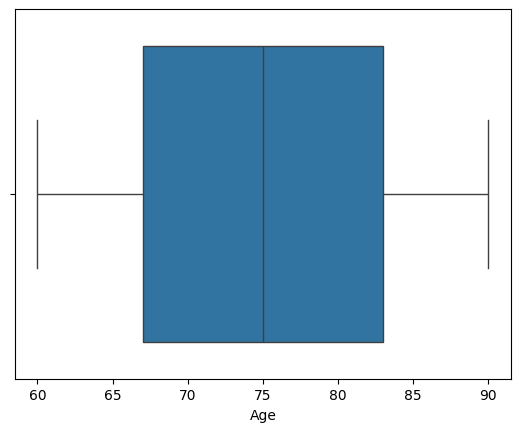

In [39]:
ax = sns.boxplot(data=df_alzheimer, x=df_alzheimer['Age'])

El presente análisis se centrará en el estudio individuos que poseen un rango etario entre los 60 y 90 años, con una mediana de 75 años.

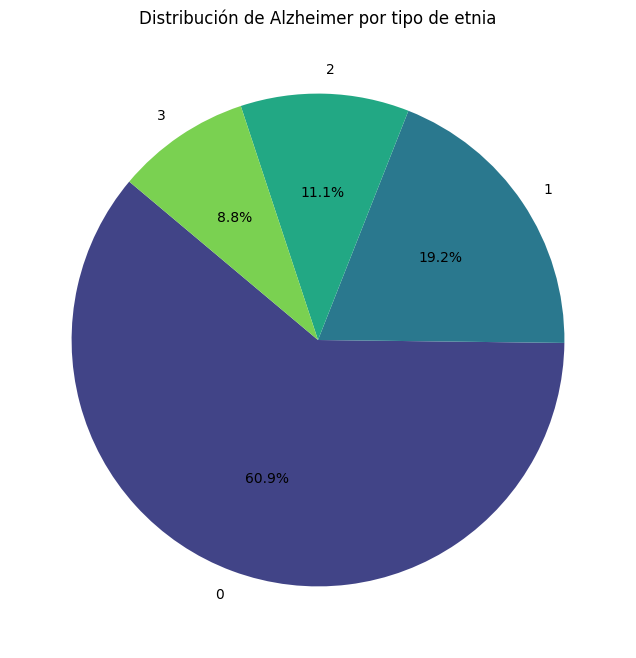

In [35]:
df_alzheimer_si = df_alzheimer[df_alzheimer['Diagnosis']==1]

etnia_freq = df_alzheimer_si['Ethnicity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(etnia_freq, labels=etnia_freq.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", len(etnia_freq)))

plt.title('Distribución de Alzheimer por tipo de etnia')

plt.show()

Lo anterior, demuestra que de la población en estudio, una gran proporción de individuos Caucásicos presentan Alzheimer, seguido luego por los Afroamericanos.

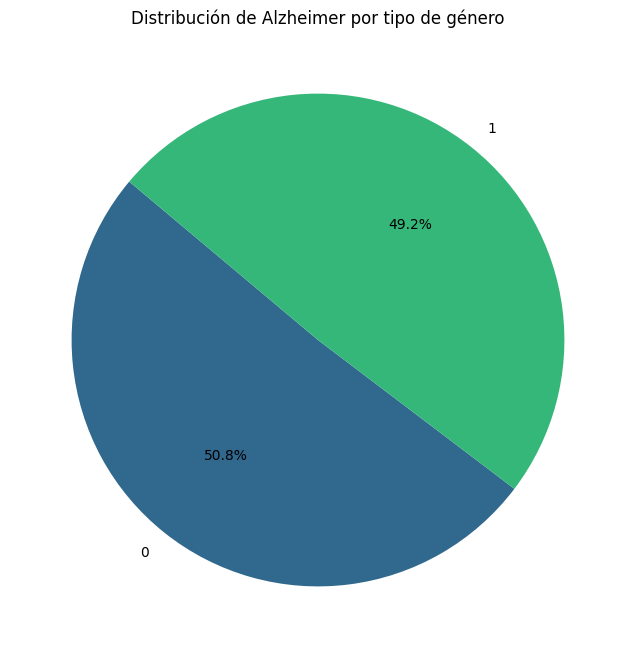

In [36]:
genero_freq = df_alzheimer_si['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genero_freq, labels=genero_freq.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", len(genero_freq)))

plt.title('Distribución de Alzheimer por tipo de género')

plt.show()

De la problación en estudio, la cantidad de hombres con Alzheimer es sólo un poco mayor que mujeres con la presencia de mencionada enfermedad.

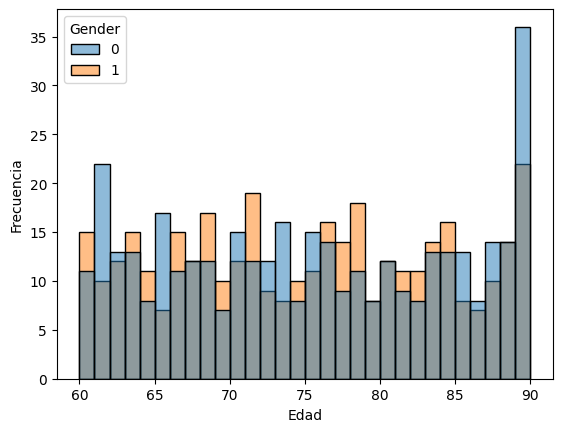

In [38]:
sns.histplot(df_alzheimer_si,x='Age',hue='Gender',bins=30)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

Este gráfico demuestra una distribución uniforme de los datos al analizar la edad de los individuos en estudio, en donde la mayor frecuencia con personas con Alzheimer son aquellos con 90 años.

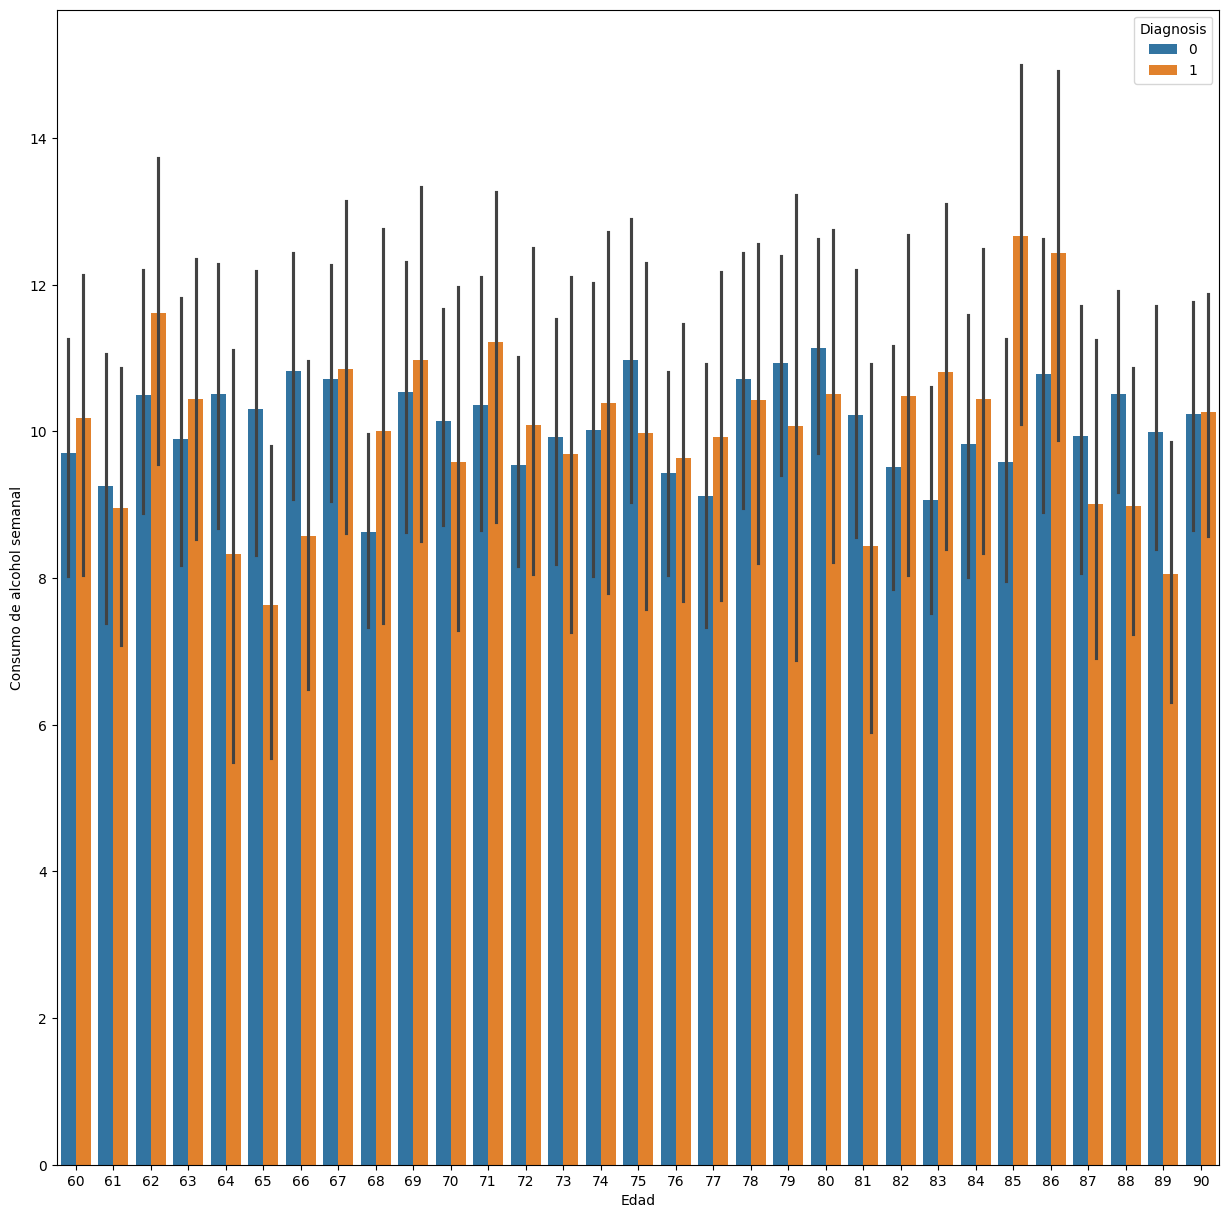

In [50]:
plt.figure(figsize=(15,15))
sns.barplot(y='AlcoholConsumption',x='Age',hue='Diagnosis',data=df_alzheimer);
plt.xlabel('Edad')
plt.ylabel('Consumo de alcohol semanal')
plt.show()

Del anterior gráfico, si bien, una porción mayor de quienes presentaron Alzheimer, poseen un mayor consumo de alcohol durante la semana, en comparación de aquellos soin dicha enfermedad, no es posible concluir que exista una clara relación.

Es posible evidenciar que

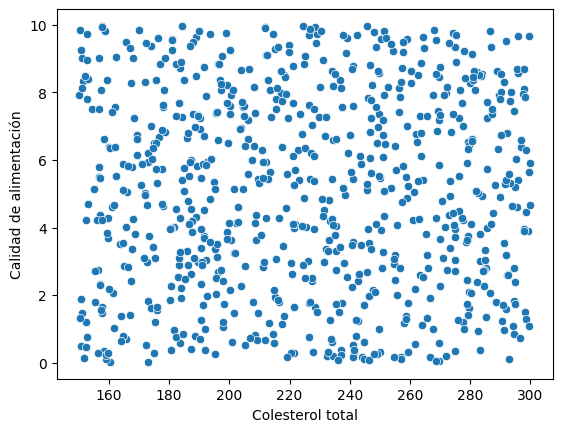

In [33]:
sns.scatterplot(data=df_alzheimer[df_alzheimer['Diagnosis']==1],x='CholesterolTotal',y='DietQuality')
plt.xlabel('Colesterol total')
plt.ylabel('Calidad de alimentación')

plt.show()

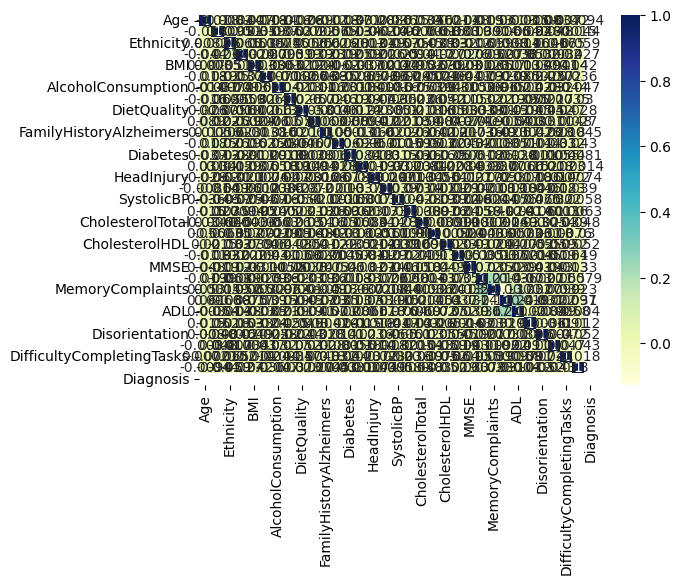

<Figure size 1200x1200 with 0 Axes>

In [54]:
sns.heatmap(df_alzheimer_si.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.figure(figsize=(12,12))
plt.show()

###**Conclusión EDA**

Del análisis realizado aún no es posible concluir si alguno de los factores en estudio, presentan alguna importancia / correlación que deba ser considerada para crear un modelo predictivo.